In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

* __Data Inspection__

In [154]:
train = pd.read_csv(r'train_s3TEQDk.csv')
test = pd.read_csv(r'test_mSzZ8RL.csv')

__Checking no. of features and no. of data samples in train and test dataset__

In [155]:
train.shape, test.shape # test data is not provided with target values

((245725, 11), (105312, 10))

 __Checking % of missing data per feature in train dataset__

In [156]:
train.isnull().sum()/train.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [157]:
test.isnull().sum()/test.shape[0]*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

* __Data Cleaning. Imputing missing data__

In [158]:
# Checking values for Credit_product feature
train['Credit_Product'].value_counts(dropna = False)

No     144357
Yes     72043
NaN     29325
Name: Credit_Product, dtype: int64

In [159]:
# Checkin values for test dataset
test['Credit_Product'].value_counts(dropna = False)

No     61608
Yes    31182
NaN    12522
Name: Credit_Product, dtype: int64

__Since Credit_Product is categorical feature, we can impute missing values by mode__

In [160]:
train['Credit_Product'].fillna(train['Credit_Product'].mode()[0], inplace = True)

In [161]:
test['Credit_Product'].fillna(test['Credit_Product'].mode()[0], inplace = True)

* __Exploratory Data Analysis__

 __Checking Categorical and numerical features in train & test dataset__

In [162]:
categorical = train.select_dtypes(include = [object]).columns.values
print('Categorical features in train dataset:', categorical)

numerical = train.select_dtypes(include = [np.int64, np.float64]).columns.values
print('Numerical features in train dataset', numerical)

Categorical features in train dataset: ['ID' 'Gender' 'Region_Code' 'Occupation' 'Channel_Code' 'Credit_Product'
 'Is_Active']
Numerical features in train dataset ['Age' 'Vintage' 'Avg_Account_Balance' 'Is_Lead']


In [163]:
categorical = test.select_dtypes(include = [object]).columns.values
print('Categorical features in test dataset', categorical)

numerical = test.select_dtypes(include = [np.int64, np.float64]).columns.values
print('Numerical features in test dataset', numerical)

Categorical features in test dataset ['ID' 'Gender' 'Region_Code' 'Occupation' 'Channel_Code' 'Credit_Product'
 'Is_Active']
Numerical features in test dataset ['Age' 'Vintage' 'Avg_Account_Balance']


 __Checking unique values per categorical feature__

In [164]:
dict_unique_values = {column:train[column].unique() for column in train.select_dtypes(include = [object]).columns}
dict_unique_values.pop('ID') # ID is unique identifier for customer. This feature is not exactly categorical.
dict_unique_values

{'Gender': array(['Female', 'Male'], dtype=object),
 'Region_Code': array(['RG268', 'RG277', 'RG270', 'RG282', 'RG261', 'RG265', 'RG283',
        'RG254', 'RG269', 'RG257', 'RG279', 'RG280', 'RG252', 'RG284',
        'RG259', 'RG281', 'RG258', 'RG266', 'RG260', 'RG274', 'RG256',
        'RG275', 'RG273', 'RG267', 'RG272', 'RG251', 'RG262', 'RG264',
        'RG278', 'RG276', 'RG263', 'RG250', 'RG255', 'RG253', 'RG271'],
       dtype=object),
 'Occupation': array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object),
 'Channel_Code': array(['X3', 'X1', 'X2', 'X4'], dtype=object),
 'Credit_Product': array(['No', 'Yes'], dtype=object),
 'Is_Active': array(['No', 'Yes'], dtype=object)}

In [165]:
# checking unique values from test data as well, to check for any inconsistecy
dict_unique_values_test = {column:test[column].unique() for column in test.select_dtypes(include = [object]).columns}
dict_unique_values_test.pop('ID') 
dict_unique_values_test

{'Gender': array(['Male', 'Female'], dtype=object),
 'Region_Code': array(['RG254', 'RG268', 'RG270', 'RG272', 'RG253', 'RG257', 'RG284',
        'RG283', 'RG277', 'RG273', 'RG261', 'RG280', 'RG274', 'RG278',
        'RG269', 'RG281', 'RG251', 'RG252', 'RG279', 'RG282', 'RG262',
        'RG263', 'RG264', 'RG256', 'RG265', 'RG260', 'RG258', 'RG271',
        'RG250', 'RG275', 'RG276', 'RG267', 'RG255', 'RG259', 'RG266'],
       dtype=object),
 'Occupation': array(['Other', 'Salaried', 'Self_Employed', 'Entrepreneur'], dtype=object),
 'Channel_Code': array(['X1', 'X2', 'X3', 'X4'], dtype=object),
 'Credit_Product': array(['Yes', 'No'], dtype=object),
 'Is_Active': array(['No', 'Yes'], dtype=object)}

In [166]:
[set(dict_unique_values_test[key]) == set(dict_unique_values[key]) for key in dict_unique_values.keys()] # used set being unordered 

[True, True, True, True, True, True]

 __Label encoding__

In [167]:
# Features Channel_Code and Region_code are having numbers in a way we can consider those as ordinal
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Channel_Code_Encoded'] = le.fit_transform(train['Channel_Code'])
test['Channel_Code_Encoded'] = le.transform(test['Channel_Code'])

# dictionary for channel_code and 
dict_channel_code = dict(zip(le.classes_, range(len(le.classes_))))

In [168]:
train['Region_Code_Encoded'] = le.fit_transform(train['Region_Code'])
test['Region_Code_Encoded'] = le.transform(test['Region_Code'])
# dictionary for Regin_Code and encoded labels for classe
dict_region_code = dict(zip(le.classes_, range(len(le.classes_))))

__Onehot Encoding__

In [169]:
train = pd.concat([train, pd.get_dummies(train[['Gender', 'Occupation', 'Credit_Product']])], axis = 1)

In [170]:
test = pd.concat([test, pd.get_dummies(test[['Gender', 'Occupation', 'Credit_Product']])], axis = 1)

* __Feature Engineering__

_Checking distributions for numerical features_

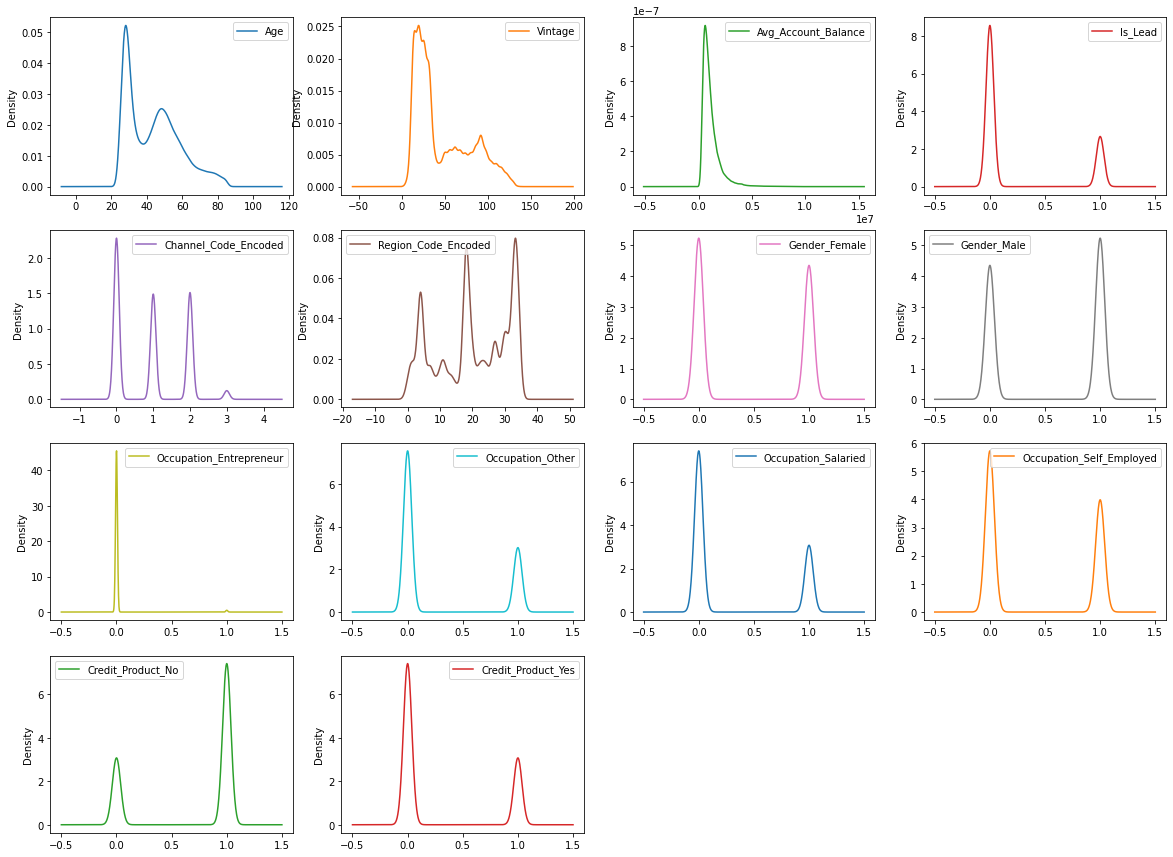

In [171]:
train.plot(kind='density', subplots=True, \
             layout=(4,4), sharex=False,figsize=(20,15))
plt.show()

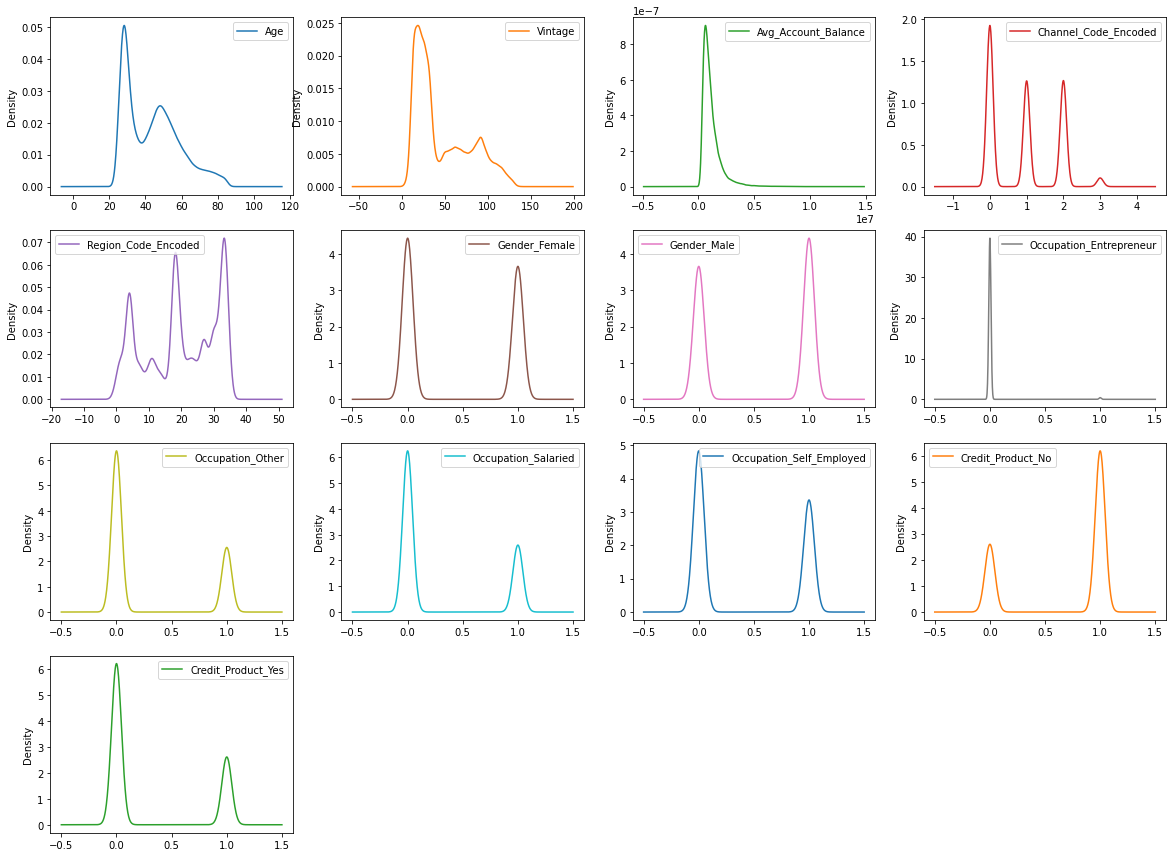

In [172]:
test.plot(kind='density', subplots=True, \
             layout=(4,4), sharex=False,figsize=(20,15))
plt.show()

_Feature Avg_Account_Balance is right skewed, using log transformer_

In [135]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

__Checking for outliers__

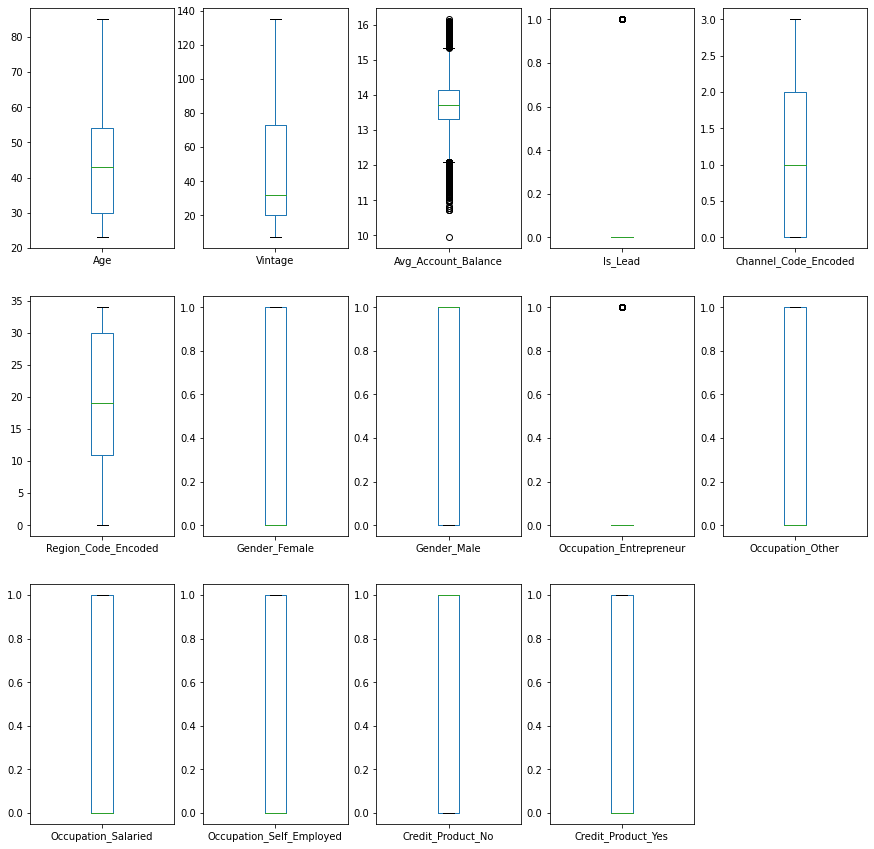

In [140]:
train.plot(kind = 'box', subplots = True, \
          layout = (3, 5), sharex = False, sharey = False, figsize = (15, 15))
plt.show()

In [148]:
# Feature Avg_Account_Balance has ouliers, other features doesn't. Using standardscaler for Age and Vintage features.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(copy = False)
train[['Age', 'Vintage']] = ss.fit_transform(train[['Age', 'Vintage']])
test[['Age', 'Vintage']] = ss.transform(test[['Age', 'Vintage']])